1. Импортируйте библиотеки Pandas, Numpy и Matplotlib.      

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочных данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

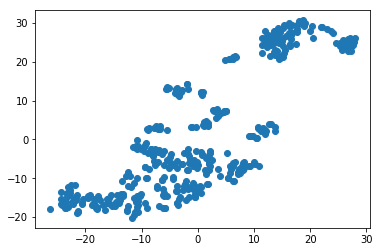

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

2. С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.  

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

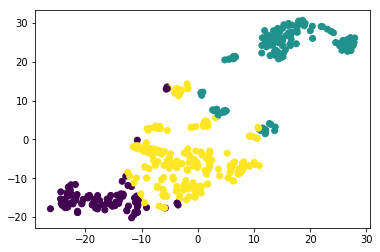

In [13]:
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [18]:
print('Кластер 0 price: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1 price: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2 price: {}'.format(y_train[labels_train == 2].mean()))

Кластер 0 price: 27.78837209302326
Кластер 1 price: 16.165354330708663
Кластер 2 price: 24.958115183246072


In [19]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.07356558139534884
Кластер 1: 10.797028425196851
Кластер 2: 0.4216602094240837


*3. Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [20]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

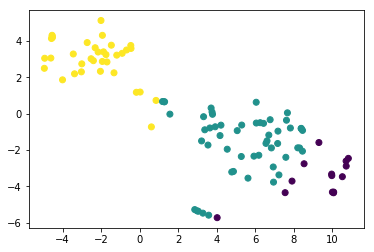

In [21]:
labels_train = kmeans.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_train)
plt.show()

In [22]:
print('Кластер 0 price: {}'.format(y_test[labels_train == 0].mean()))
print('Кластер 1 price: {}'.format(y_test[labels_train == 1].mean()))
print('Кластер 2 price: {}'.format(y_test[labels_train == 2].mean()))

Кластер 0 price: 33.871428571428574
Кластер 1 price: 21.552830188679245
Кластер 2 price: 16.43714285714286


In [23]:
print('Кластер 0: {}'.format(X_test.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.08618571428571427
Кластер 1: 0.25200716981132076
Кластер 2: 10.165531142857143
